# Scikit Learn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
dataset = pd.read_csv('../data/data.csv')
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:, -1].values
print(X)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


In [6]:
# impute missing values for the first 3 columns
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:,1:3])
X[:,1:3] = imputer.transform(X[:,1:3])
print(X)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 63777.77777777778]
 ['France' 35.0 58000.0]
 ['Spain' 38.77777777777778 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


In [8]:
# convert country to categorical value
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])],
                       remainder = 'passthrough')
X = np.array(ct.fit_transform(X))
print(X)

[[1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [0.0 1.0 0.0 30.0 54000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 35.0 58000.0]
 [0.0 0.0 1.0 38.77777777777778 52000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


In [9]:
# encode the last column of our dataset
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print(y)

[0 1 0 0 1 1 0 1 0 1]


In [17]:
# split into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)
print(X_train)
print(len(X_train))
print(y_train)
print(len(y_train))

[[0.0 0.0 1.0 38.77777777777778 52000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 35.0 58000.0]]
8
[0 1 0 0 1 1 0 1]
8


In [12]:
# feature scaling: standardization vs normalization
# here we perform feature scaling

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:,3:] = sc.fit_transform(X_train[:,3:])
X_test[:,3:] = sc.transform(X_test[:,3:])
print(X_train)
print(y_train)
print(X_test)

[[0.0 0.0 1.0 -0.1915918438457855 -1.0781259408412427]
 [0.0 1.0 0.0 -0.014117293757057819 -0.0701316764163541]
 [1.0 0.0 0.0 0.5667085065333239 0.6335624327104546]
 [0.0 0.0 1.0 -0.30453019390224867 -0.307866172742979]
 [0.0 0.0 1.0 -1.901801144700799 -1.4204636155515822]
 [1.0 0.0 0.0 1.1475343068237056 1.2326533634535488]
 [0.0 1.0 0.0 1.4379472069688966 1.5749910381638883]
 [1.0 0.0 0.0 -0.7401495441200352 -0.5646194287757336]]
[0 1 0 0 1 1 0 1]
[[0.0 1.0 0.0 -1.4661817944830127 -0.9069571034860731]
 [1.0 0.0 0.0 -0.44973664397484414 0.2056403393225302]]


[1.45562581 1.06043181]
2
<class 'numpy.ndarray'> 8
<class 'numpy.ndarray'> 8


ValueError: x and y must be the same size

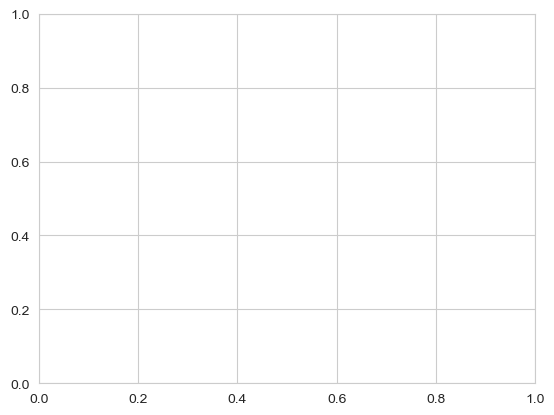

In [28]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
print(y_pred)
print(len(y_pred))
print(f"{type(X_train)} {len(X_train)}")
print(f"{type(y_train)} {len(y_train)}")
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Salary vs Experiment (Training set)')
plt.xlabel("Years of experience")
plt.ylabel("Salary")
plt.show()